In [65]:
import pandas as pd
import numpy as np

In [66]:
data = pd.read_csv(r"C:\Users\kumar\OneDrive\creditcard.csv")

In [67]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [68]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

**Exploratory data analysis**

In [69]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<Axes: xlabel='Class', ylabel='count'>

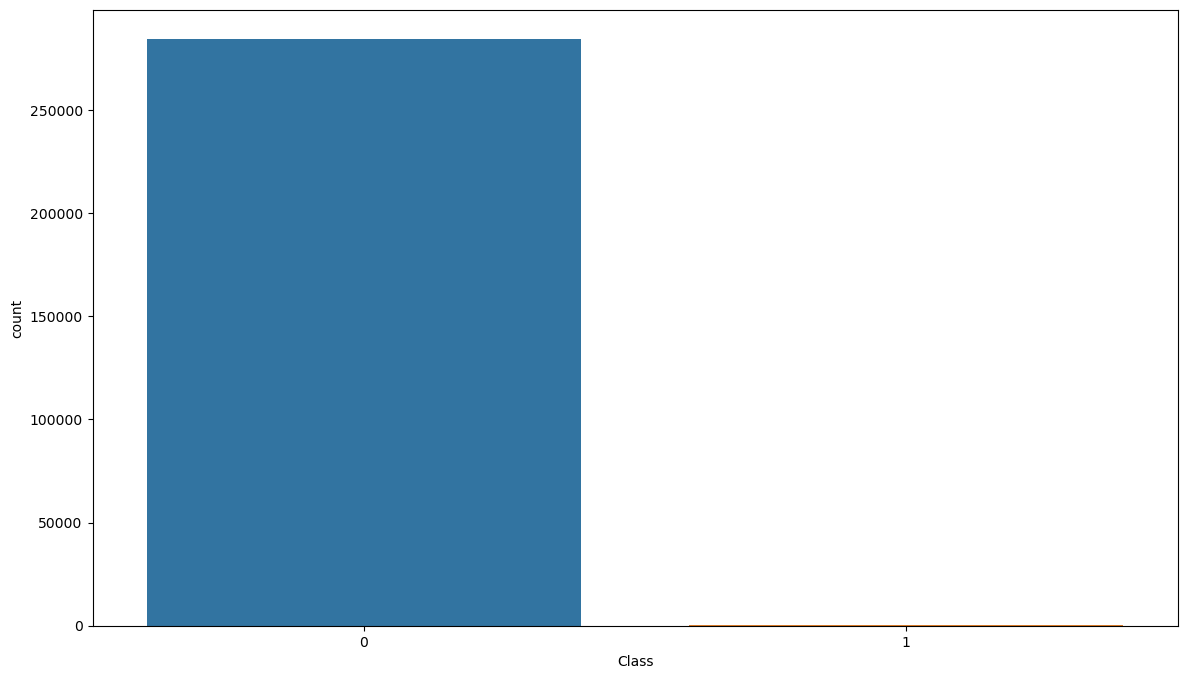

In [70]:
# plt.ylim(0,1000)
sns.countplot(data=data,x='Class')

In [71]:
fraud=data[data['Class']==1]
normal=data[data['Class']==0]

In [72]:
fraud.shape,normal.shape

((492, 31), (284315, 31))

In [73]:
normal['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [74]:
fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

<Axes: xlabel='Amount', ylabel='Count'>

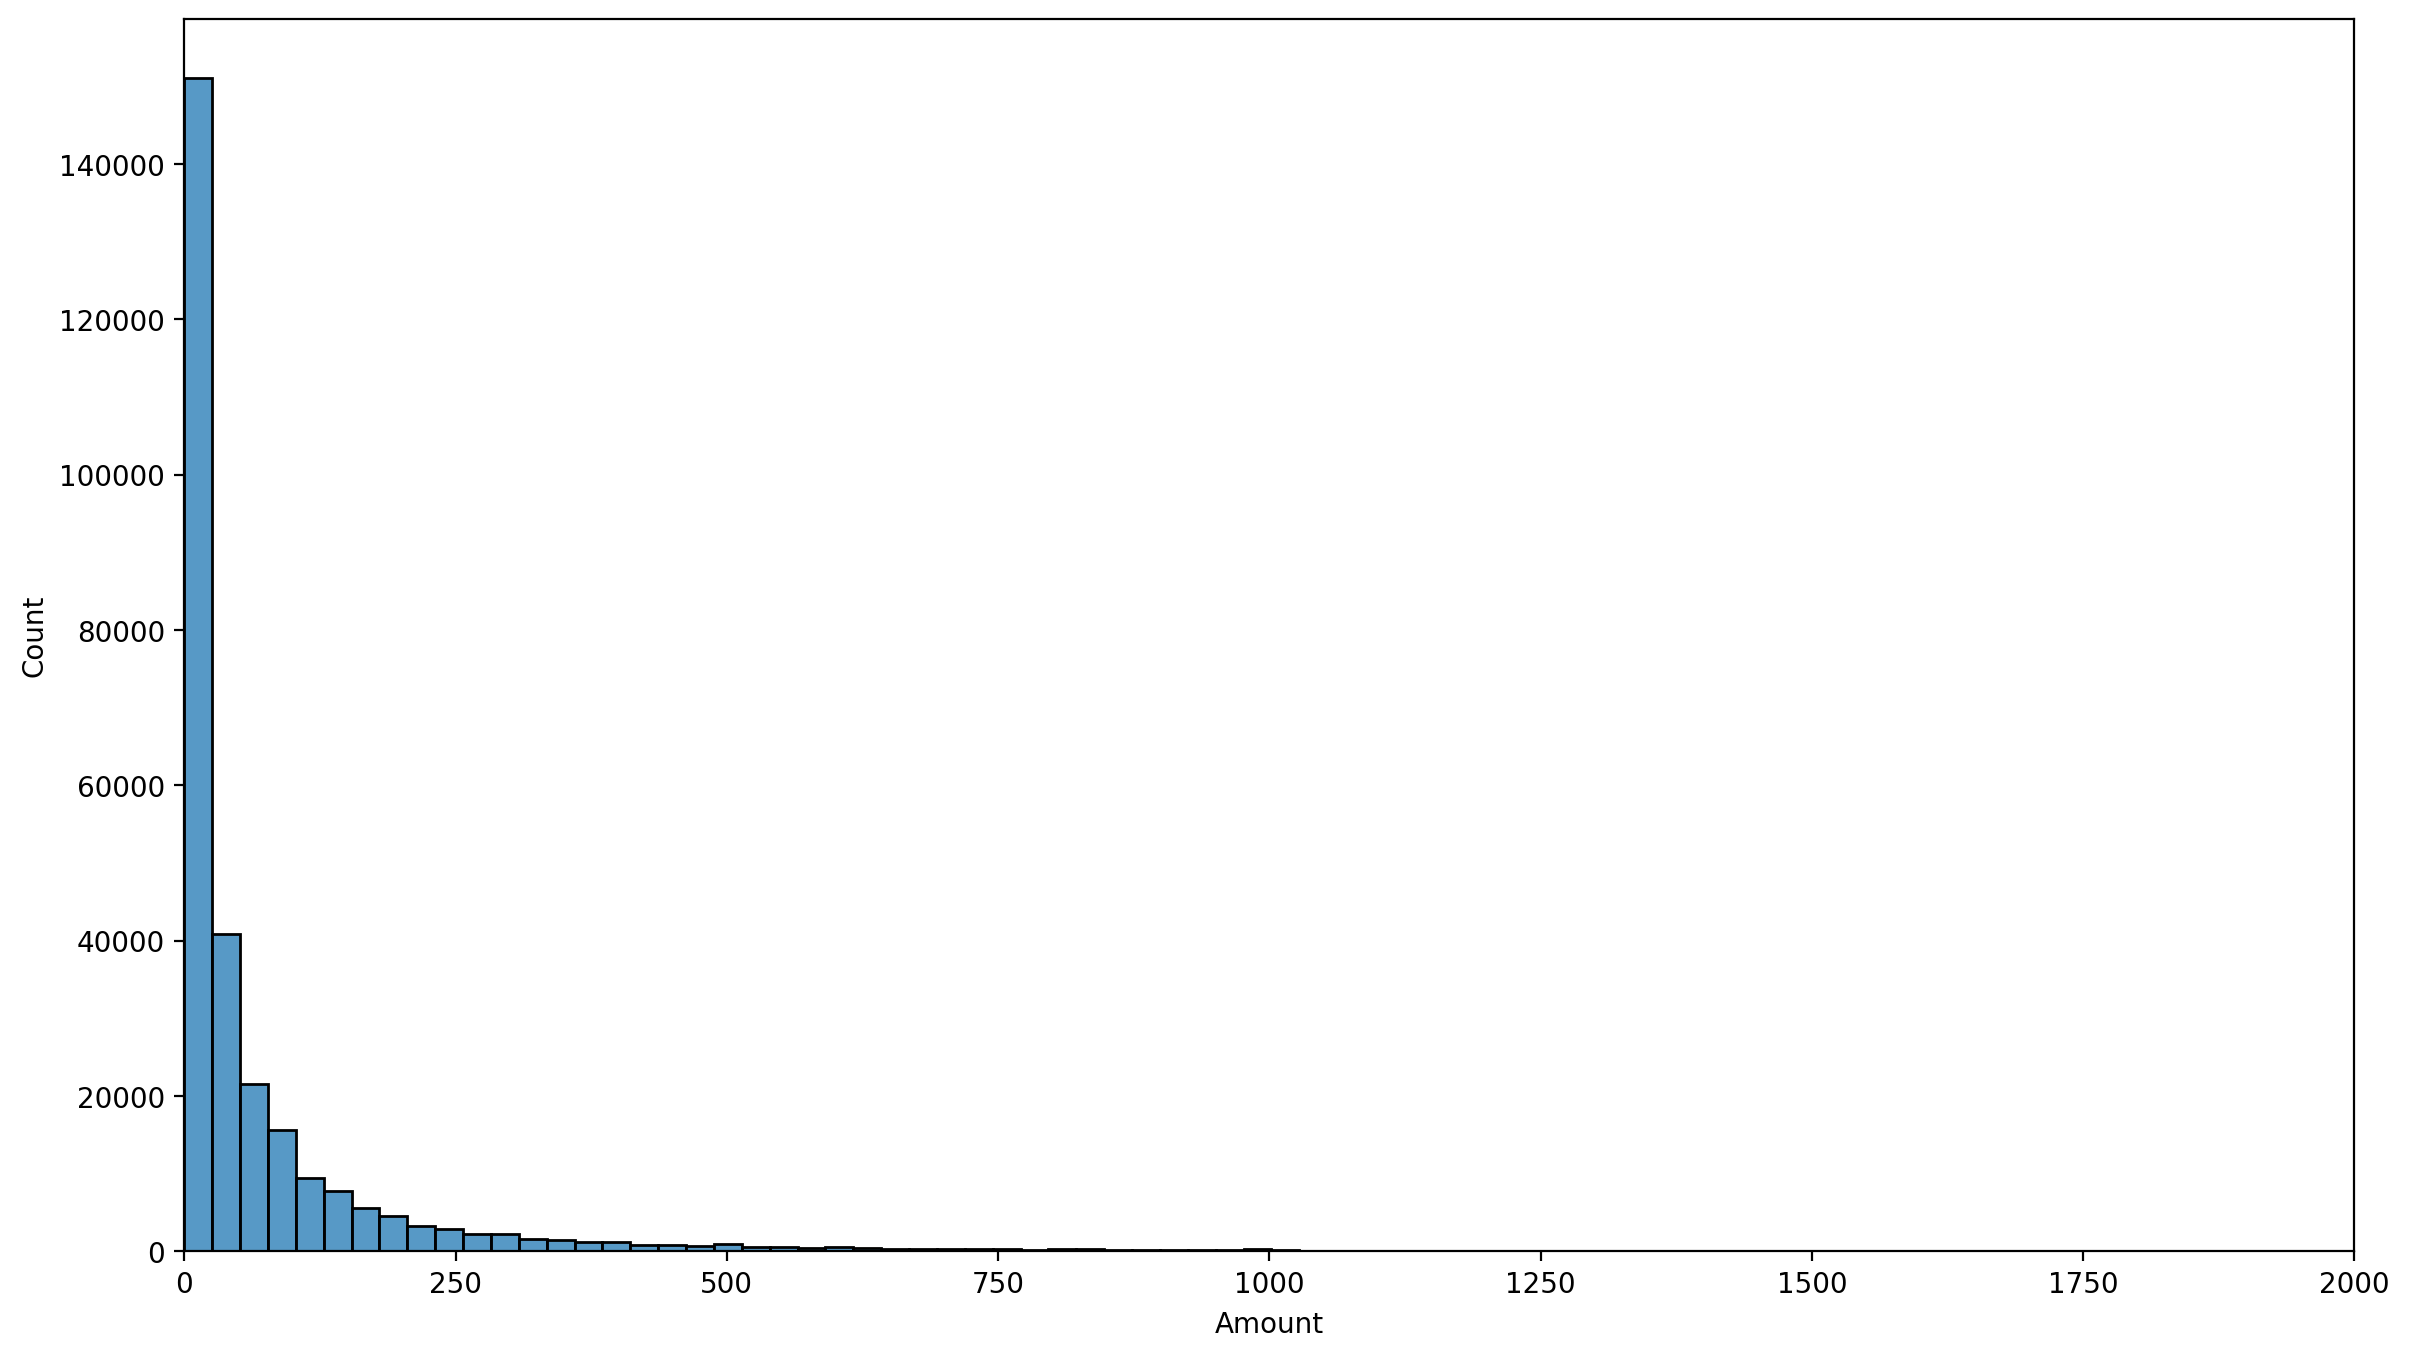

In [76]:
plt.figure(dpi=200)
plt.xlim(0,2000)
sns.histplot(data=data,x='Amount',bins=1000)

<Axes: xlabel='Time', ylabel='Amount'>

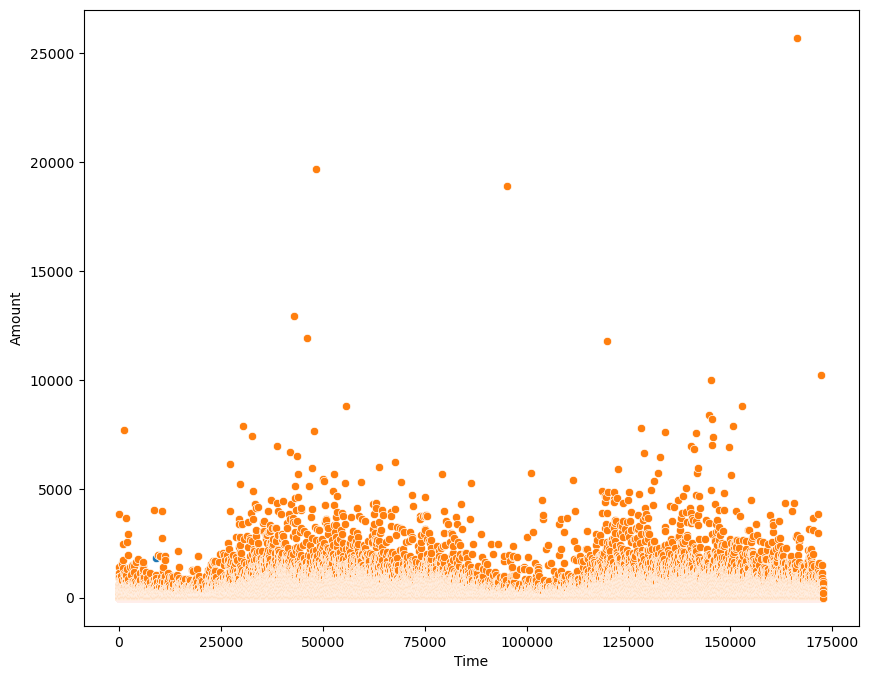

In [77]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=fraud,x='Time',y='Amount')
sns.scatterplot(data=normal,x='Time',y='Amount')

In [78]:
outlier_fraction = len(fraud)/len(data)

In [79]:
outlier_fraction

0.001727485630620034

In [80]:
print(f"No. of fraud cases: {len(fraud)}")
print(f"No. of non-fraud cases: {len(normal)}")
print(f"Outlier fraction: {outlier_fraction}")

No. of fraud cases: 492
No. of non-fraud cases: 284315
Outlier fraction: 0.001727485630620034


<Axes: >

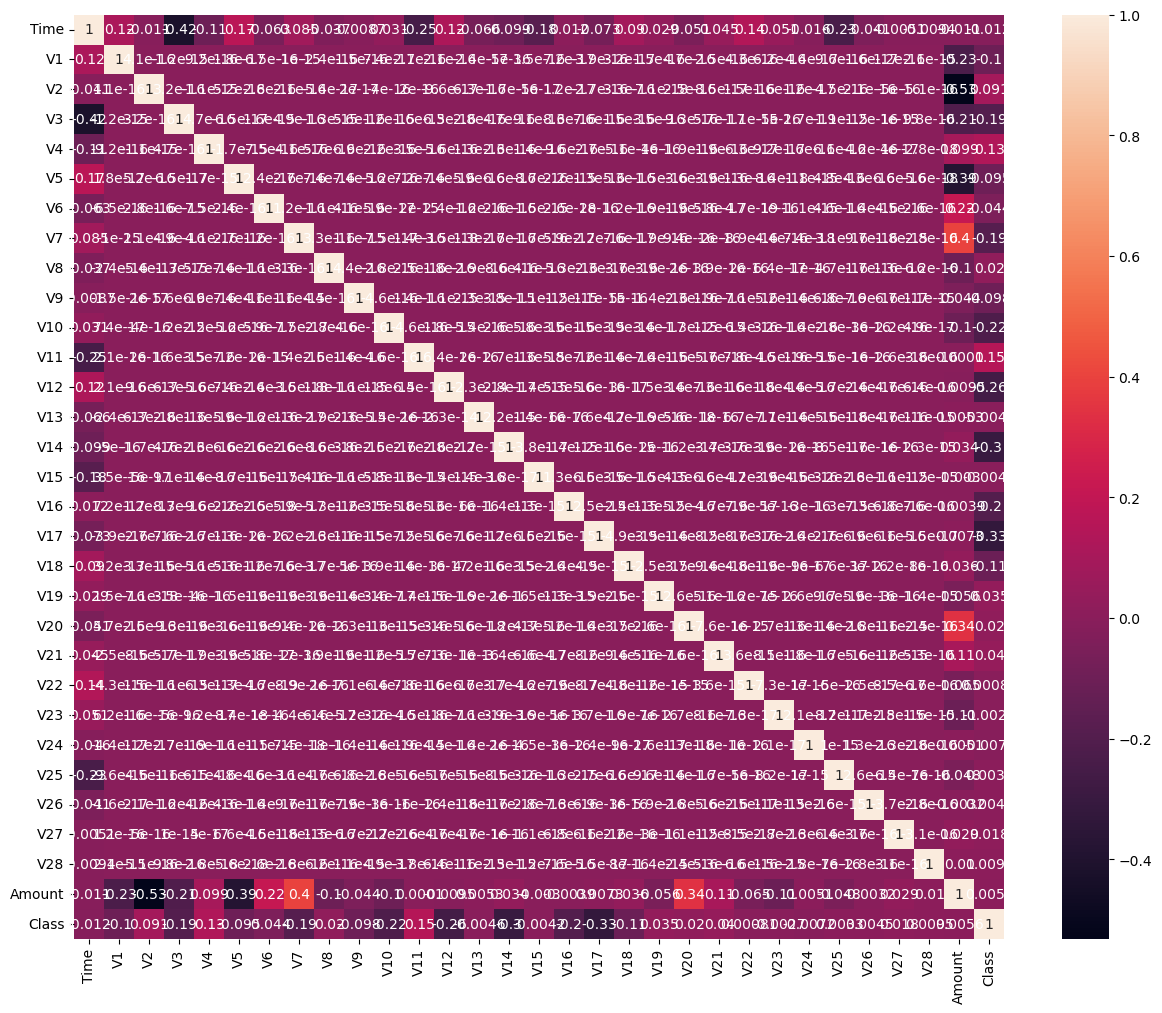

In [81]:
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(),annot=True)

In [82]:
Y_data=data['Class']
X_data=data.drop('Class',axis=1)

In [83]:
##Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X_data), 
                                       contamination=outlier_fraction,random_state=101, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1)
   
}

In [ ]:
n_outliers = len(fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        Y_pred = clf.fit_predict(X_data)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X_data)
        Y_pred = clf.predict(X_data)
    else:    
        clf.fit(X_data)
        scores_prediction = clf.decision_function(X_data)
        Y_pred = clf.predict(X_data)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    Y_pred[Y_pred == 1] = 0
    Y_pred[Y_pred == -1] = 1
    n_errors = (Y_pred != Y_data).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy_Score :")
    print(accuracy_score(Y_data,Y_pred))
    print("Classification Report :")
    print(classification_report(Y_data,Y_pred))

Isolation Forest: 660
Accuracy_Score :
0.9976826412272171
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.33      0.33      0.33       492

    accuracy                           1.00    284807
   macro avg       0.66      0.66      0.66    284807
weighted avg       1.00      1.00      1.00    284807

Local Outlier Factor: 934
Accuracy_Score :
0.9967205862215465
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.05      0.05      0.05       492

    accuracy                           1.00    284807
   macro avg       0.52      0.52      0.52    284807
weighted avg       1.00      1.00      1.00    284807

